In [ ]:
!pip install pandas sqlalchemy chardet unidecode python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Carregando os Arquivos CSV

print("\nCarregando os arquivos CSV...")

# Ajuste os caminhos se necessário (ex: '/content/' para upload direto)
df_cadastro = pd.read_csv('/content/PicMoney-Base_Cadastral_de_Players-10_000 linhas (1).csv', delimiter=';')
df_transacoes = pd.read_csv('/content/PicMoney-Base_de_Transa__es_-_Cupons_Capturados-100000 linhas (1).csv', delimiter=';')
df_pedestres = pd.read_csv('/content/PicMoney-Base_Simulada_-_Pedestres_Av__Paulista-100000 linhas (1).csv', delimiter=';')
df_massa_teste = pd.read_csv('/content/PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000 linhas (1).csv', delimiter=';')

print("Todos os arquivos foram carregados com sucesso.")

# Inspeção Inicial dos DataFrames

dataframes = {
    "Cadastro de Players": df_cadastro,
    "Transações e Cupons": df_transacoes,
    "Pedestres Av. Paulista": df_pedestres,
    "Massa de Teste": df_massa_teste
}

for name, df in dataframes.items():
    print(f"\nInspeção do DataFrame: {name}")
    print("\n 5 primeiras linhas:")
    print(df.head())
    print(f"\n Dimensões (Linhas, Colunas): {df.shape}")
    print("\n Resumo do DataFrame:")
    df.info()

print("\n Inspeção concluída.")



Carregando os arquivos CSV...
Todos os arquivos foram carregados com sucesso.

Inspeção do DataFrame: Cadastro de Players

 5 primeiras linhas:
           celular data_nascimento  idade       sexo cidade_residencial  \
0  (11) 91409-5506      12/10/1969     55  Masculino          São Paulo   
1  (11) 91520-1488      19/02/1981     44  Masculino          São Paulo   
2  (11) 98359-5557      10/09/1979     45  Masculino          São Paulo   
3  (11) 96514-2674      05/03/1957     68  Masculino          São Paulo   
4  (11) 99785-3045      30/10/1969     55   Feminino          São Paulo   

  bairro_residencial cidade_trabalho bairro_trabalho cidade_escola  \
0                 Sé             NaN             NaN           NaN   
1           Ipiranga             NaN             NaN           NaN   
2            Santana             NaN             NaN           NaN   
3              Penha             NaN             NaN           NaN   
4            Tatuapé             NaN             NaN  

In [ ]:
# 2.1 Tratamento do DataFrame de Cadastro (df_cadastro)

print("\nTratando o DataFrame: Cadastro de Players")

# Verificação de valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df_cadastro.isnull().sum())

# Conversão de tipos de dados
print("\nConvertendo tipos de dados...")
df_cadastro['data_nascimento'] = pd.to_datetime(df_cadastro['data_nascimento'], errors='coerce')

# Verificação de duplicatas
duplicated_rows = df_cadastro.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicated_rows}")

# Consistência dos dados categóricos
print("\nValores únicos na coluna 'sexo':")
print(df_cadastro['sexo'].value_counts())
print("\nValores únicos na coluna 'cidade_residencial' (Top 10):")
print(df_cadastro['cidade_residencial'].value_counts().head(10))

# 2.2 Tratamento do DataFrame de Transações (df_transacoes)

print("\nTratando o DataFrame: Transações e Cupons")

# Verificação de valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df_transacoes.isnull().sum())

# Conversão de tipos de dados
print("\nConvertendo tipos de dados...")
df_transacoes['data'] = pd.to_datetime(df_transacoes['data'], errors='coerce')
# Colunas de valor podem ter ',' como separador decimal
for col in ['valor_cupom', 'repasse_picmoney']:
    if df_transacoes[col].dtype == 'object':
        df_transacoes[col] = df_transacoes[col].str.replace(',', '.').astype(float)

# Verificação de duplicatas
duplicated_rows = df_transacoes.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicated_rows}")

# Consistência dos dados categóricos
print("\nValores únicos na coluna 'categoria_estabelecimento':")
print(df_transacoes['categoria_estabelecimento'].value_counts())
print("\nValores únicos na coluna 'tipo_cupom':")
print(df_transacoes['tipo_cupom'].value_counts())

# 2.3 Tratamento do DataFrame de Pedestres (df_pedestres)

print("\nTratando o DataFrame: Pedestres Av. Paulista")

# Verificação de valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df_pedestres.isnull().sum())

# Função para corrigir formato numérico com múltiplos pontos
def correct_numeric_format(series):
    # Remove todos os pontos, exceto o primeiro encontrado
    return series.astype(str).apply(lambda x: x.replace('.', '', x.count('.') - 1) if x.count('.') > 1 else x).astype(float)

print("\nCorrigindo formato e convertendo lat/long para numérico...")
df_pedestres['latitude'] = correct_numeric_format(df_pedestres['latitude'])
df_pedestres['longitude'] = correct_numeric_format(df_pedestres['longitude'])

# Conversão de tipos de dados
df_pedestres['horario'] = pd.to_datetime(df_pedestres['horario'], format='%H:%M:%S', errors='coerce').dt.time
print("Tipos de dados corrigidos.")

# Verificação de duplicatas
duplicated_rows = df_pedestres.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicated_rows}")

# 2.4 Tratamento da Massa de Teste (df_massa_teste)

print("\nTratando o DataFrame: Massa de Teste")
# Verificação de valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df_massa_teste.isnull().sum())

# Verificação de duplicatas
duplicated_rows = df_massa_teste.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicated_rows}")

print("\nLimpeza de dados concluída.")



Tratando o DataFrame: Cadastro de Players

Contagem de valores ausentes por coluna:
celular                     0
data_nascimento             0
idade                       0
sexo                        0
cidade_residencial          0
bairro_residencial          0
cidade_trabalho          3969
bairro_trabalho          3969
cidade_escola            6932
bairro_escola            6932
categoria_frequentada       0
dtype: int64

Convertendo tipos de dados...

Número de linhas duplicadas: 0

Valores únicos na coluna 'sexo':
sexo
Outro        3356
Masculino    3322
Feminino     3322
Name: count, dtype: int64

Valores únicos na coluna 'cidade_residencial' (Top 10):
cidade_residencial
São Paulo    8967
Cardoso        16
Ramos          15
Sales          14
Silva          13
Costa          13
Oliveira       12
Viana          11
da Cruz        11
Gomes          11
Name: count, dtype: int64

Tratando o DataFrame: Transações e Cupons

Contagem de valores ausentes por coluna:
celular                

In [ ]:
# Derivar Merchants da Massa de Teste (se necessário)
print("\nDerivando Merchants da Massa de Teste...")
merchants = df_massa_teste[['nome_loja', 'tipo_loja', 'local_captura', 'latitude', 'longitude', 'endereco_loja', 'valor_compra']].dropna(subset=['nome_loja']).drop_duplicates()
print(f"Merchants derivados: {merchants.shape}")

# Integrar Dados (Formatar e Combinar)
print("\nIntegrando dados...")

# Exemplo: Juntar Cadastro com Transações
df_integrado = pd.merge(df_cadastro, df_transacoes, left_on='celular', right_on='celular', how='inner')
print(f"DataFrame integrado (Cadastro + Transações): {df_integrado.shape}")

# Formatar: Renomear colunas para consistência (baseado em ingest.py)
rename_map = {
    'numero_celular': 'celular',
    'nome_estabelecimento': 'nome_loja',
    'endereco_estabelecimento': 'endereco_loja',
    'valor_de_compra': 'valor_compra',
    'valor_do_cupom': 'valor_cupom',
    'repasse': 'repasse_picmoney'
}
df_integrado = df_integrado.rename(columns=rename_map)

# Salvar dados processados (opcional, para formato final)
df_integrado.to_csv('/content/dados_integrados.csv', index=False)
merchants.to_csv('/content/merchants.csv', index=False)

print("\nIntegração e formatação concluídas. Dados salvos em CSV.")



Derivando Merchants da Massa de Teste...
Merchants derivados: (10000, 7)

Integrando dados...
DataFrame integrado (Cadastro + Transações): (100011, 22)

Integração e formatação concluídas. Dados salvos em CSV.



Selecionando dados relevantes...
DataFrame final selecionado: (100011, 6)

Amostra dos dados finais:
           celular  idade       sexo    nome_loja  valor_cupom  \
0  (11) 91409-5506     55  Masculino     Just Run       241.34   
1  (11) 91409-5506     55  Masculino  Burger King       275.72   
2  (11) 91409-5506     55  Masculino   Forever 21       962.69   
3  (11) 91409-5506     55  Masculino        Extra       615.98   
4  (11) 91409-5506     55  Masculino     Drogasil       714.09   

   repasse_picmoney  
0            111.80  
1             13.79  
2            130.45  
3             30.80  
4             35.70  

Estatísticas descritivas dos valores:
               idade    valor_cupom  repasse_picmoney
count  100011.000000  100011.000000     100011.000000
mean       53.074292     550.495628         70.478253
std        21.445837     259.410257         90.828075
min        16.000000     100.010000          1.070000
25%        35.000000     326.635000         16.180000
50%   

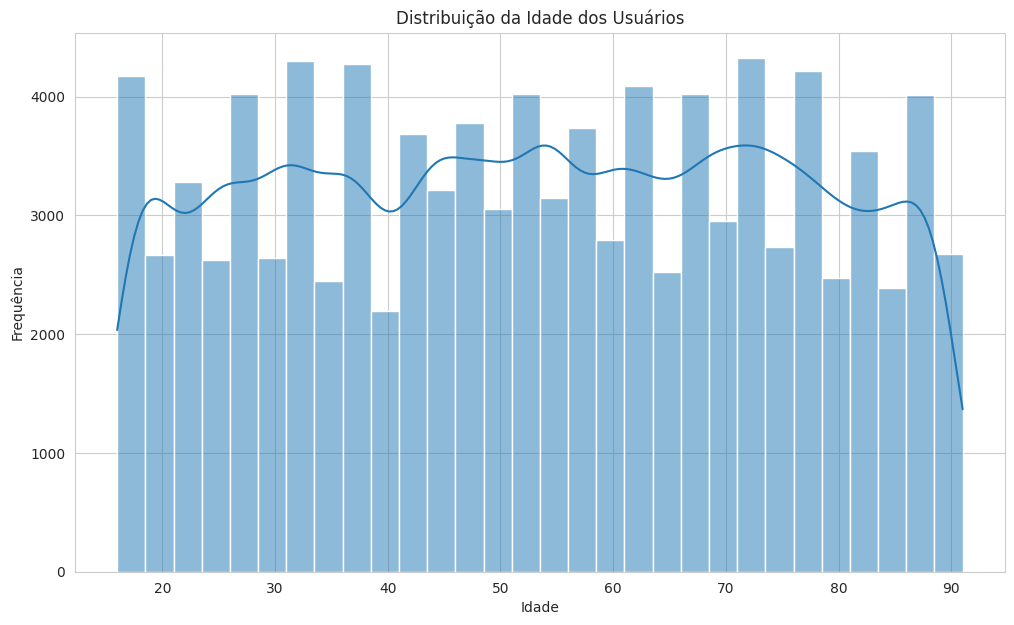

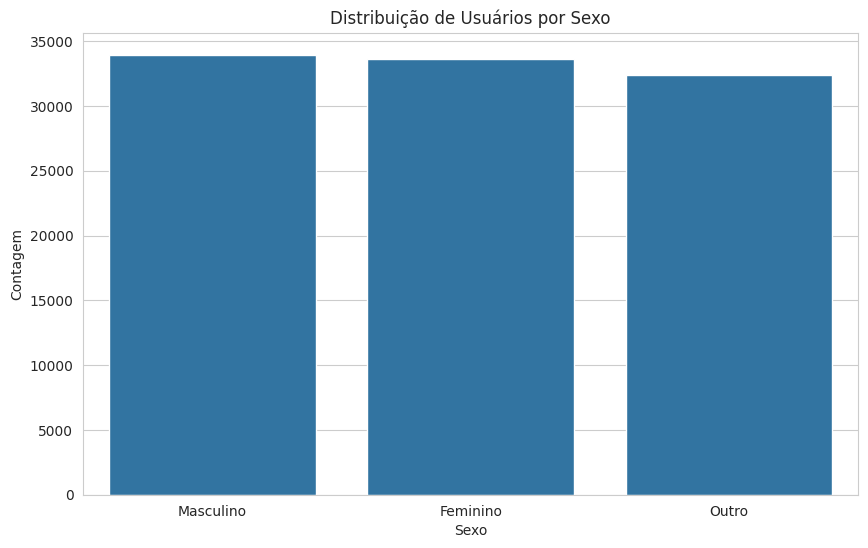

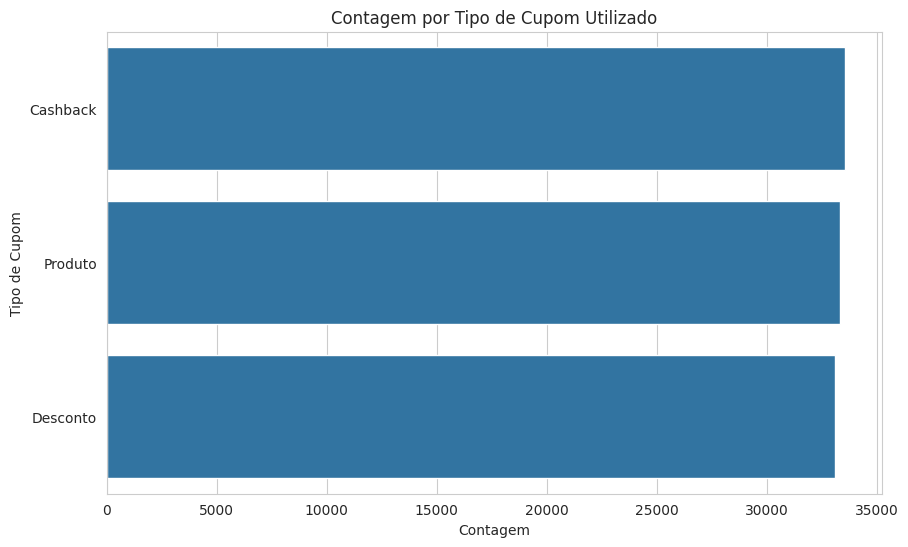


Preparação de dados e gráficos concluídos.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Selecionar Dados Relevantes e Verificar
print("\nSelecionando dados relevantes...")
df_final = df_integrado[['celular', 'idade', 'sexo', 'nome_loja', 'valor_cupom', 'repasse_picmoney']]
print(f"DataFrame final selecionado: {df_final.shape}")
print("\nAmostra dos dados finais:")
print(df_final.head())

# Verificações básicas
print("\nEstatísticas descritivas dos valores:")
print(df_final[['idade', 'valor_cupom', 'repasse_picmoney']].describe())

# Gráficos básicos
print("\nGerando gráficos...")

# Histograma da idade
plt.figure(figsize=(12, 7))
sns.histplot(df_final['idade'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Gráfico de barras para distribuição por sexo
plt.figure(figsize=(10, 6))
sns.countplot(x='sexo', data=df_final, order=df_final['sexo'].value_counts().index)
plt.title('Distribuição de Usuários por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

# Gráfico de barras para tipo de cupom
plt.figure(figsize=(10, 6))
sns.countplot(y='tipo_cupom', data=df_integrado, order=df_integrado['tipo_cupom'].value_counts().index)
plt.title('Contagem por Tipo de Cupom Utilizado')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Cupom')
plt.show()

print("\nPreparação de dados e gráficos concluídos.")
